In [1]:
import pandas as pd
import numpy as np
import darts
import yfinance as yf

# visualization
import matplotlib.pyplot as plt

# timeseries with darts
import torch
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts import concatenate
from darts.models import BlockRNNModel

# RF model test with Covariate
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# darts model evaluation
from darts.metrics import mape, rmse, r2_score

c:\Users\dicod\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# Data preparation for model development

df =pd.read_csv(r'C:\Users\dicod\Documents\2024\project_with Hamid(2024_3rd semester)\code\Data\final_df.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = df['Date'].apply(lambda x:x[0:10])
df['Date'] = pd.to_datetime(df['Date'])


# dataframe to timeseries
ts_price = TimeSeries.from_dataframe(df, time_col=None, value_cols='Close', fill_missing_dates=False, freq='D')
ts_Volume = TimeSeries.from_dataframe(df, time_col=None, value_cols='Volume', fill_missing_dates=False, freq='D')
ts_EPS = TimeSeries.from_dataframe(df, time_col=None, value_cols='EPS', fill_missing_dates=False, freq='D')
ts_PE = TimeSeries.from_dataframe(df, time_col=None, value_cols='P/E', fill_missing_dates=False, freq='D')
ts_PS = TimeSeries.from_dataframe(df, time_col=None, value_cols='P/S', fill_missing_dates=False, freq='D')

# scaler
scaler = Scaler()
scaled_price, scaled_Volume, scaled_EPS, scaled_PE, scaled_PS = scaler.fit_transform([ts_price, ts_Volume, ts_EPS, ts_PE, ts_PS] )

my_multivariate_series = concatenate([scaled_price, scaled_Volume, scaled_EPS, scaled_PE, scaled_PS], axis=1)

# split the data into train and validation
train, validation = my_multivariate_series.split_after(0.8)

# define the covarients using train and validation data

past_cov_train_vol = train['Volume']
past_cov_val_vol = validation['Volume']

past_cov_train_fn = train[['Volume', 'EPS', 'P/E', 'P/S']]
past_cov_val_fn = validation[['Volume', 'EPS', 'P/E', 'P/S']]

### Parameters
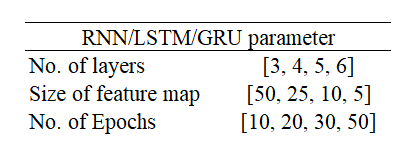

### Results
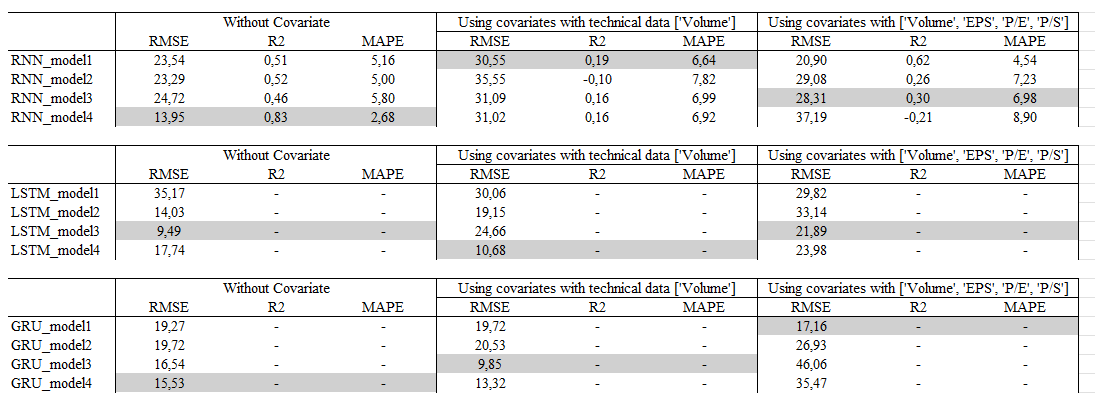

### without covariates

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 12.8 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
13.4 K    Trainable params
0         Non-trainable params
13.4 K    Total params
0.053     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 23.54
R2 = 0.51
MAPE = 5.16


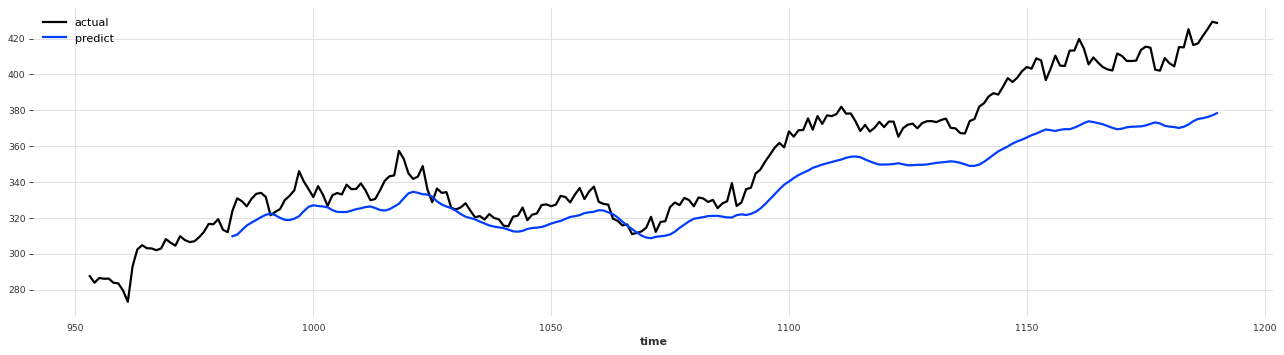

In [14]:
rnn_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
rnn_1.fit(train['Close'])

pred_rnnseries_1 = rnn_1.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_1) 

# Evaluation
rnn_1_rmse = rmse(actual_pris, pred_pris)
rnn_1_r2 = r2_score(actual_pris, pred_pris)
rnn_1_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_1_rmse)
print("R2 = %.2f" % rnn_1_r2)
print("MAPE = %.2f" % rnn_1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 25.7 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
26.4 K    Trainable params
0         Non-trainable params
26.4 K    Total params
0.105     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 23.32
R2 = 0.52
MAPE = 5.00


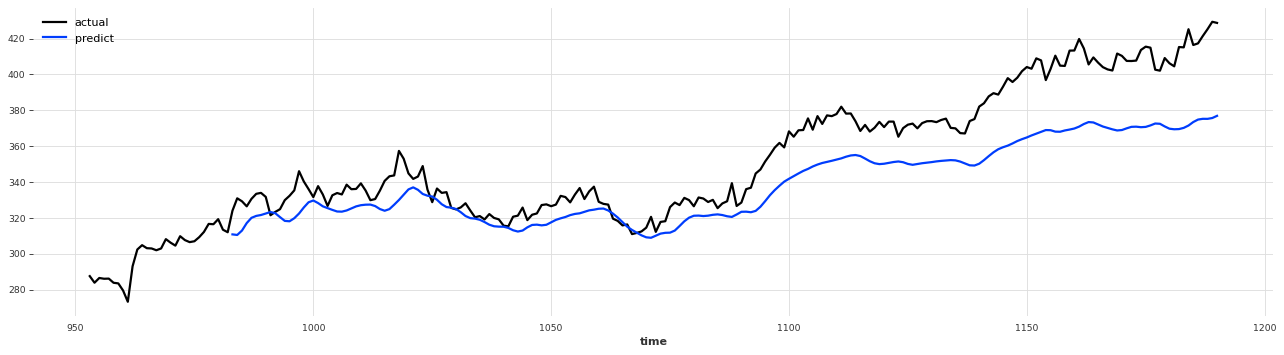

In [17]:
past_cov_train = train['Volume']
past_cov_val = validation['Volume']

rnn_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
rnn_2.fit(train['Close'])

pred_rnnseries_2 = rnn_2.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_2) 

rnn_2_rmse = rmse(actual_pris, pred_pris)
rnn_2_r2 = r2_score(actual_pris, pred_pris)
rnn_2_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_2_rmse)
print("R2 = %.2f" % rnn_2_r2)
print("MAPE = %.2f" % rnn_2_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 44.9 K
4 | fc            | Sequential       | 710   
---------------------------------------------------
45.6 K    Trainable params
0         Non-trainable params
45.6 K    Total params
0.182     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 24.72
R2 = 0.46
MAPE = 5.80


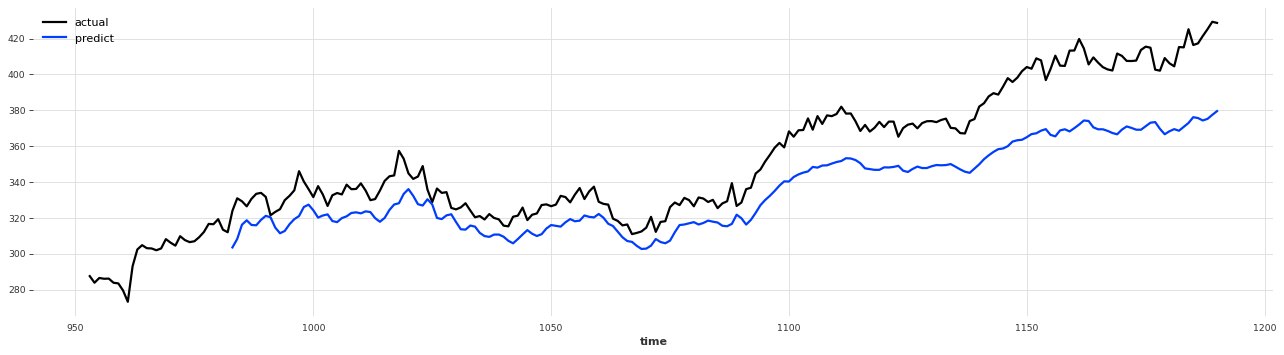

In [18]:
rnn_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
rnn_3.fit(train['Close'])

pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_3) 

rnn_3_rmse = rmse(actual_pris, pred_pris)
rnn_3_r2 = r2_score(actual_pris, pred_pris)
rnn_3_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_3_rmse)
print("R2 = %.2f" % rnn_3_r2)
print("MAPE = %.2f" % rnn_3_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 111 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.449     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 13.95
R2 = 0.83
MAPE = 2.68


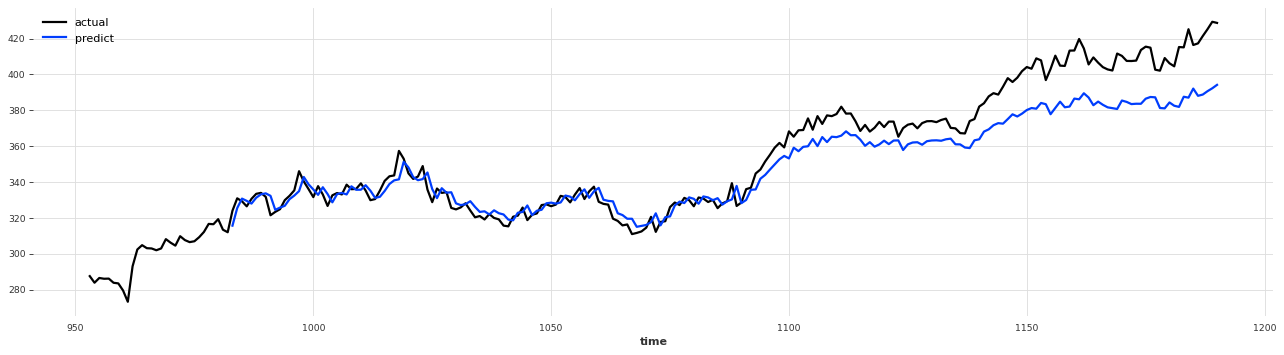

In [19]:
rnn_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
rnn_4.fit(train['Close'])

pred_rnnseries_4 = rnn_4.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_4) 

rnn_4_rmse = rmse(actual_pris, pred_pris)
rnn_4_r2 = r2_score(actual_pris, pred_pris)
rnn_4_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_4_rmse)
print("R2 = %.2f" % rnn_4_r2)
print("MAPE = %.2f" % rnn_4_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

### With covariates['Volume] - technical data

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 12.9 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
13.4 K    Trainable params
0         Non-trainable params
13.4 K    Total params
0.054     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 30.55
R2 = 0.19
MAPE = 6.64


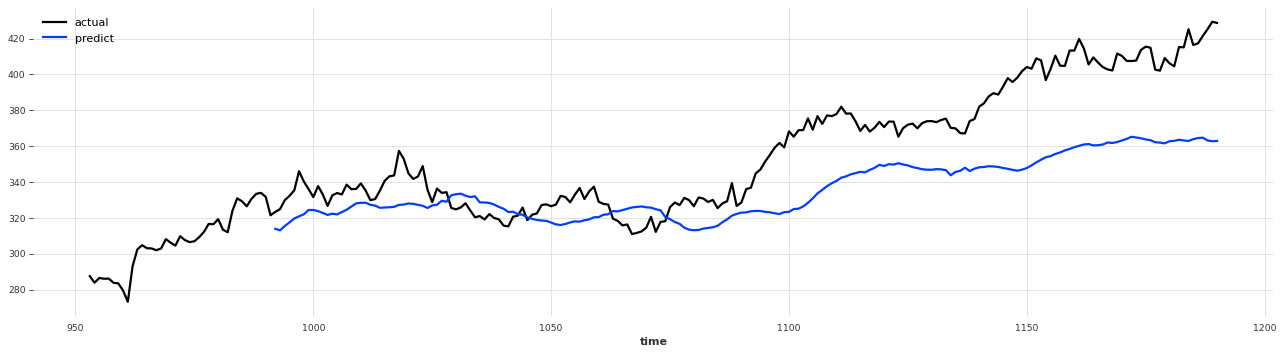

In [20]:
# using train and validation data
past_cov_train = train['Volume']
past_cov_val = validation['Volume']

rnn_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
rnn_1.fit(train['Close'], past_covariates=past_cov_train)

pred_rnnseries_1 = rnn_1.historical_forecasts(
    series=validation['Close'],
    forecast_horizon=10,
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)
actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_1) 

rnn_1_rmse = rmse(actual_pris, pred_pris)
rnn_1_r2 = r2_score(actual_pris, pred_pris)
rnn_1_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_1_rmse)
print("R2 = %.2f" % rnn_1_r2)
print("MAPE = %.2f" % rnn_1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 25.8 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
26.4 K    Trainable params
0         Non-trainable params
26.4 K    Total params
0.106     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 35.55
R2 = -0.10
MAPE = 7.82


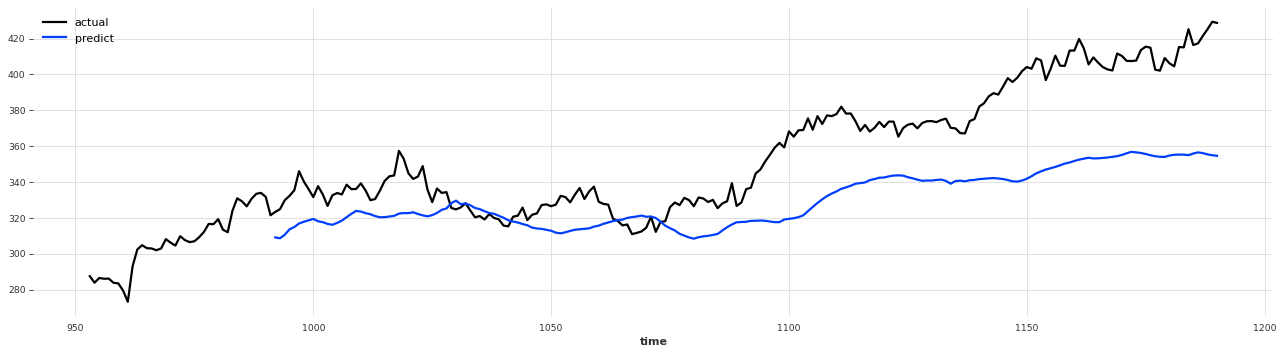

In [21]:
rnn_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
rnn_2.fit(train['Close'], past_covariates=past_cov_train)

pred_rnnseries_2 = rnn_2.historical_forecasts(
    series=validation['Close'],
    forecast_horizon=10,
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_2) 


rnn_2_rmse = rmse(actual_pris, pred_pris)
rnn_2_r2 = r2_score(actual_pris, pred_pris)
rnn_2_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_2_rmse)
print("R2 = %.2f" % rnn_2_r2)
print("MAPE = %.2f" % rnn_2_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 44.9 K
4 | fc            | Sequential       | 710   
---------------------------------------------------
45.6 K    Trainable params
0         Non-trainable params
45.6 K    Total params
0.183     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 31.09
R2 = 0.16
MAPE = 6.99


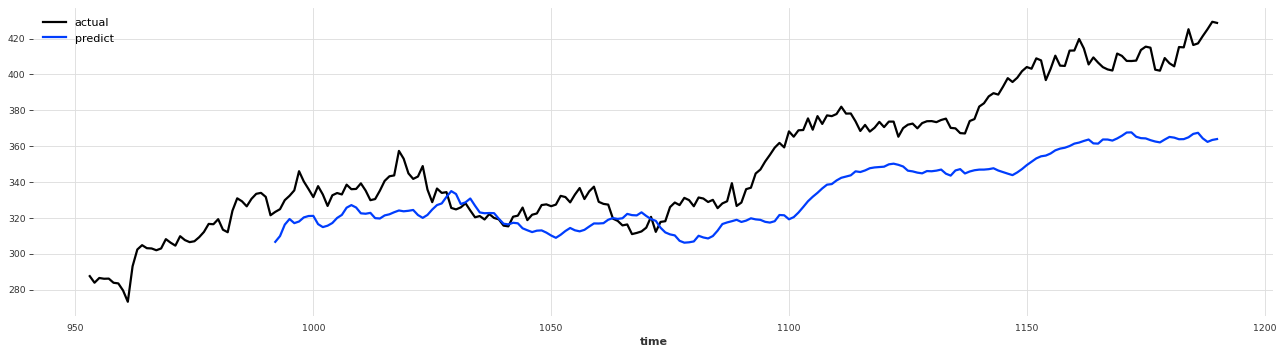

In [24]:
rnn_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
rnn_3.fit(train['Close'], past_covariates=past_cov_train)

pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=validation['Close'],
    forecast_horizon=10,
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_3) 

rnn_3_rmse = rmse(actual_pris, pred_pris)
rnn_3_r2 = r2_score(actual_pris, pred_pris)
rnn_3_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_3_rmse)
print("R2 = %.2f" % rnn_3_r2)
print("MAPE = %.2f" % rnn_3_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 111 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.450     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 31.02
R2 = 0.16
MAPE = 6.92


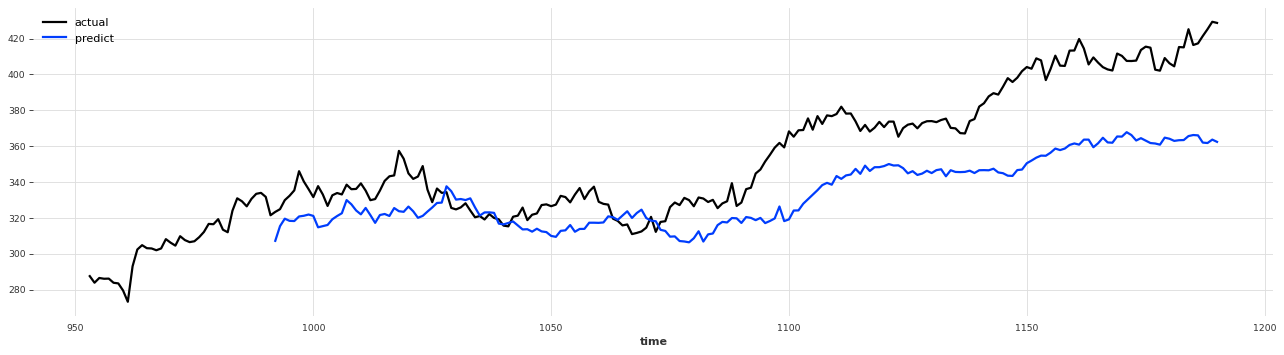

In [25]:


rnn_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
rnn_4.fit(train['Close'], past_covariates=past_cov_train)


pred_rnnseries_4 = rnn_4.historical_forecasts(
    series=validation['Close'],
    forecast_horizon=10,
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_4) 

rnn_4_rmse = rmse(actual_pris, pred_pris)
rnn_4_r2 = r2_score(actual_pris, pred_pris)
rnn_4_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_4_rmse)
print("R2 = %.2f" % rnn_4_r2)
print("MAPE = %.2f" % rnn_4_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

### With fn covariates

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 13.1 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
13.6 K    Trainable params
0         Non-trainable params
13.6 K    Total params
0.054     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 20.90
R2 = 0.62
MAPE = 4.54


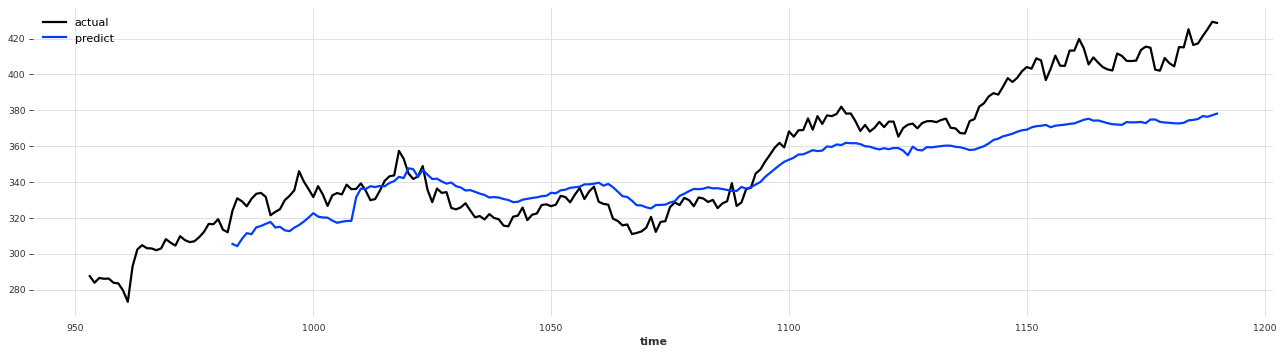

In [26]:
rnn_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
rnn_1.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_rnnseries_1 = rnn_1.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_1) 

rnn_1_rmse = rmse(actual_pris, pred_pris)
rnn_1_r2 = r2_score(actual_pris, pred_pris)
rnn_1_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_1_rmse)
print("R2 = %.2f" % rnn_1_r2)
print("MAPE = %.2f" % rnn_1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 26.0 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
26.6 K    Trainable params
0         Non-trainable params
26.6 K    Total params
0.106     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 29.08
R2 = 0.26
MAPE = 7.23


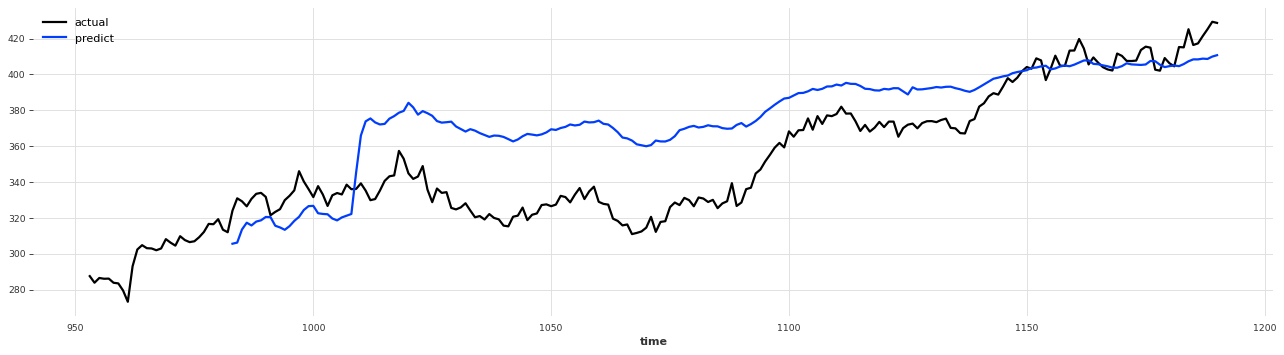

In [27]:
rnn_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
rnn_2.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_rnnseries_2 = rnn_2.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)
actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_2) 

rnn_2_rmse = rmse(actual_pris, pred_pris)
rnn_2_r2 = r2_score(actual_pris, pred_pris)
rnn_2_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_2_rmse)
print("R2 = %.2f" % rnn_2_r2)
print("MAPE = %.2f" % rnn_2_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 45.1 K
4 | fc            | Sequential       | 710   
---------------------------------------------------
45.9 K    Trainable params
0         Non-trainable params
45.9 K    Total params
0.183     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 28.31
R2 = 0.30
MAPE = 6.98


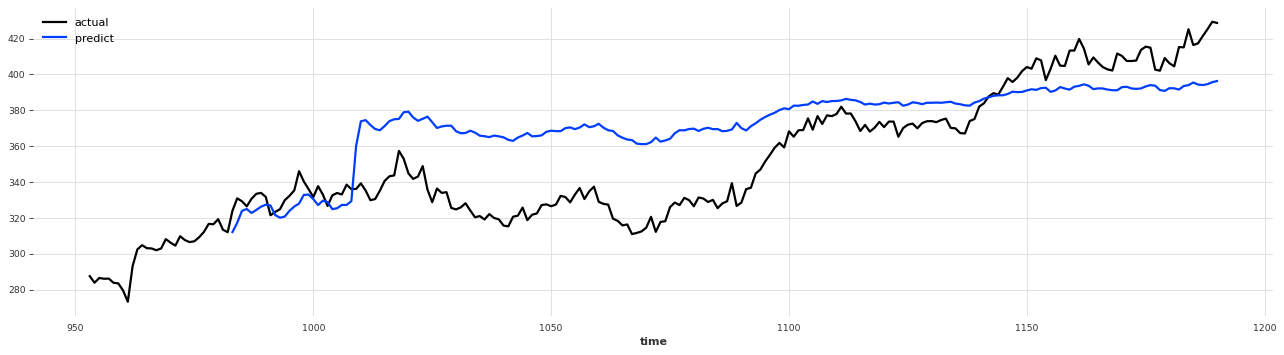

In [28]:
rnn_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
rnn_3.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_rnnseries_3 = rnn_3.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_3)

rnn_3_rmse = rmse(actual_pris, pred_pris)
rnn_3_r2 = r2_score(actual_pris, pred_pris)
rnn_3_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_3_rmse)
print("R2 = %.2f" % rnn_3_r2)
print("MAPE = %.2f" % rnn_3_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 111 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
112 K     Trainable params
0         Non-trainable params
112 K     Total params
0.451     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 37.19
R2 = -0.21
MAPE = 8.90


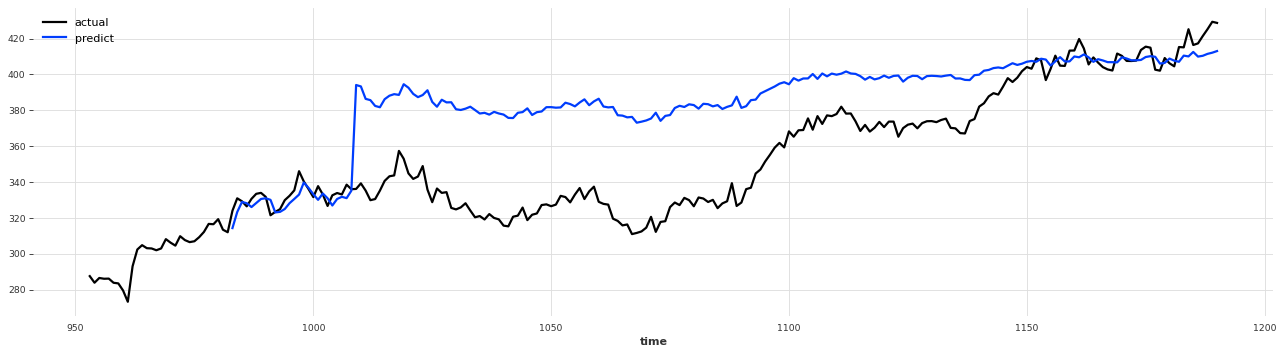

In [29]:
rnn_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="RNN",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
rnn_4.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_rnnseries_4 = rnn_4.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

actual_pris = scaler.inverse_transform(validation['Close']) 
pred_pris = scaler.inverse_transform(pred_rnnseries_4)

rnn_4_rmse = rmse(actual_pris, pred_pris)
rnn_4_r2 = r2_score(actual_pris, pred_pris)
rnn_4_mape = mape(actual_pris, pred_pris)

print("RMSE = %.2f" % rnn_4_rmse)
print("R2 = %.2f" % rnn_4_r2)
print("MAPE = %.2f" % rnn_4_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

# LSTM

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 51.4 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
51.9 K    Trainable params
0         Non-trainable params
51.9 K    Total params
0.208     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 35.17


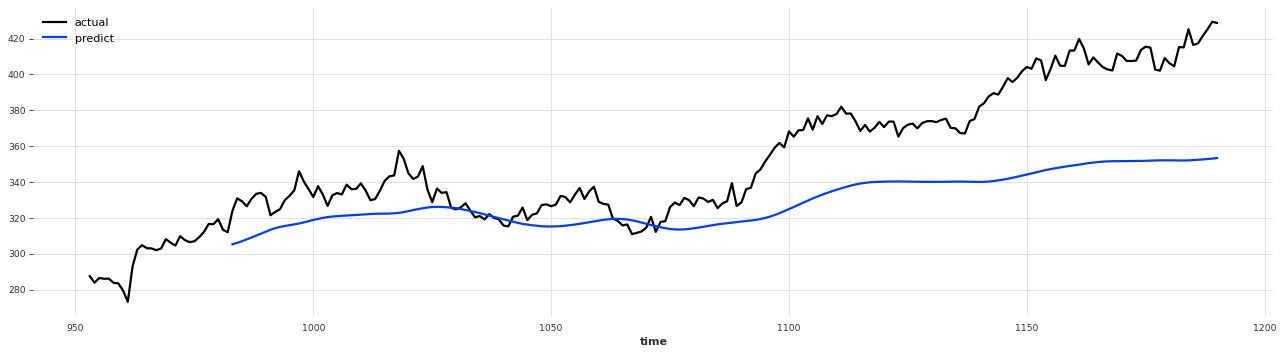

In [65]:
LSTM_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
LSTM_1.fit(train['Close'])

pred_LSTM_series_1 = LSTM_1.historical_forecasts(
    series=validation['Close'],#[:len(pred_LSTM_series_1)],  # Adjust the length of validation series
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  # Adjust the length of actual series
pred_pris = scaler.inverse_transform(pred_LSTM_series_1) # Evaluation
# Evaluation
LSTM1_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM1_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 102 K 
4 | fc            | Sequential       | 610   
---------------------------------------------------
103 K     Trainable params
0         Non-trainable params
103 K     Total params
0.414     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 14.03


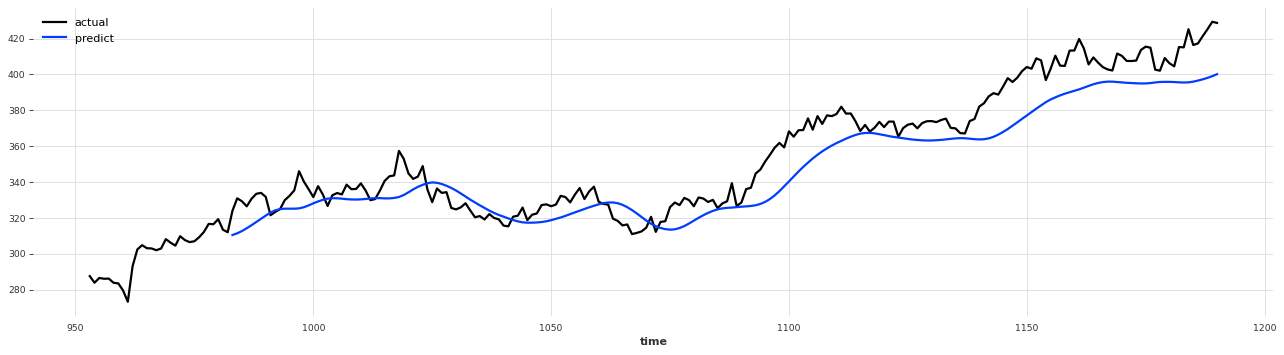

In [66]:
LSTM_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
LSTM_2.fit(train['Close'])

pred_LSTM_series_2 = LSTM_2.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_2) 

# Evaluation
LSTM2_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM2_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 179 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
180 K     Trainable params
0         Non-trainable params
180 K     Total params
0.721     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 9.49


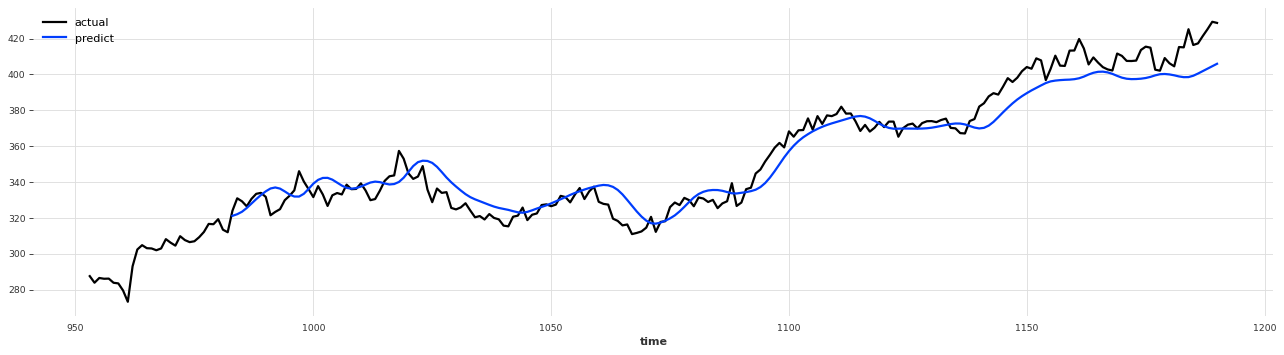

In [68]:
LSTM_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
LSTM_3.fit(train['Close'])

pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_3) 

# Evaluation
LSTM3_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM3_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 445 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
446 K     Trainable params
0         Non-trainable params
446 K     Total params
1.785     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 17.24


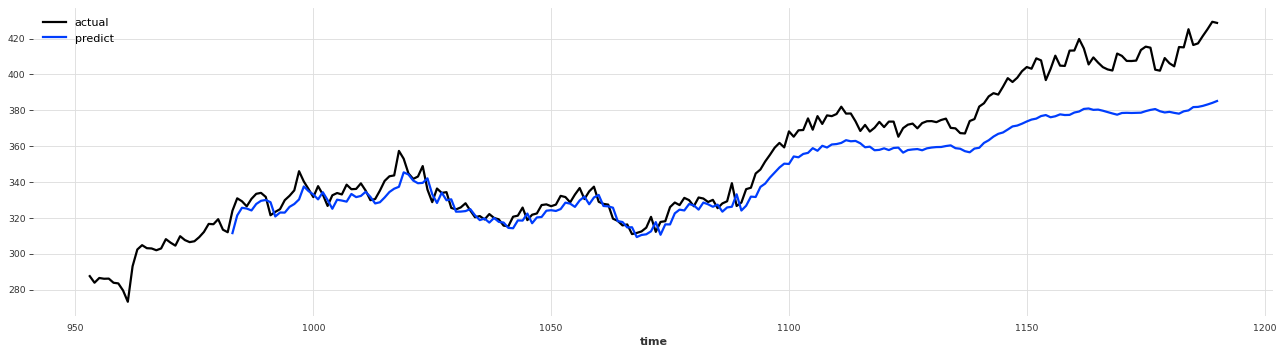

In [70]:
LSTM_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
LSTM_4.fit(train['Close'])

pred_LSTM_series_4 = LSTM_4.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_4) 

# Evaluation
LSTM4_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM4_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

### With covariate[Volume]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 51.6 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
52.1 K    Trainable params
0         Non-trainable params
52.1 K    Total params
0.208     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 30.06


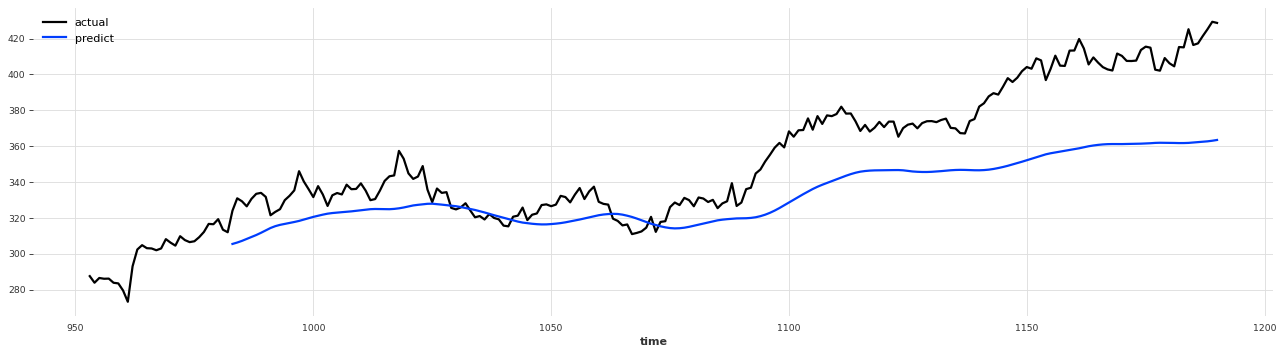

In [72]:
LSTM_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
LSTM_1.fit(train['Close'], past_covariates=past_cov_train)

pred_LSTM_series_1 = LSTM_1.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  # Adjust the length of actual series
pred_pris = scaler.inverse_transform(pred_LSTM_series_1) # Evaluation
# Evaluation
LSTM1_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM1_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 103 K 
4 | fc            | Sequential       | 610   
---------------------------------------------------
103 K     Trainable params
0         Non-trainable params
103 K     Total params
0.415     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 19.15


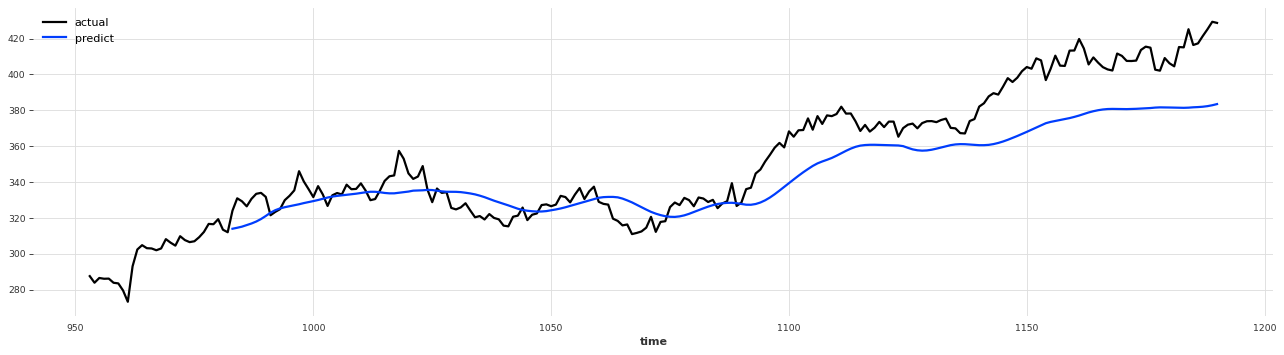

In [74]:
LSTM_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
LSTM_2.fit(train['Close'],past_covariates=past_cov_train)

pred_LSTM_series_2 = LSTM_2.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_2) 

# Evaluation
LSTM2_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM2_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 179 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
180 K     Trainable params
0         Non-trainable params
180 K     Total params
0.722     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 24.66


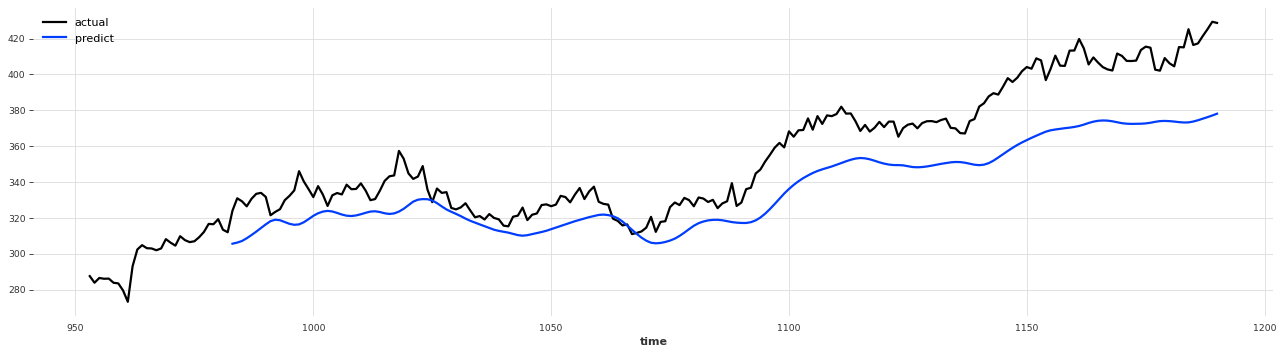

In [75]:
LSTM_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
LSTM_3.fit(train['Close'], past_covariates=past_cov_train)

pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_3) 

# Evaluation
LSTM3_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM3_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 445 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
446 K     Trainable params
0         Non-trainable params
446 K     Total params
1.786     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 10.68


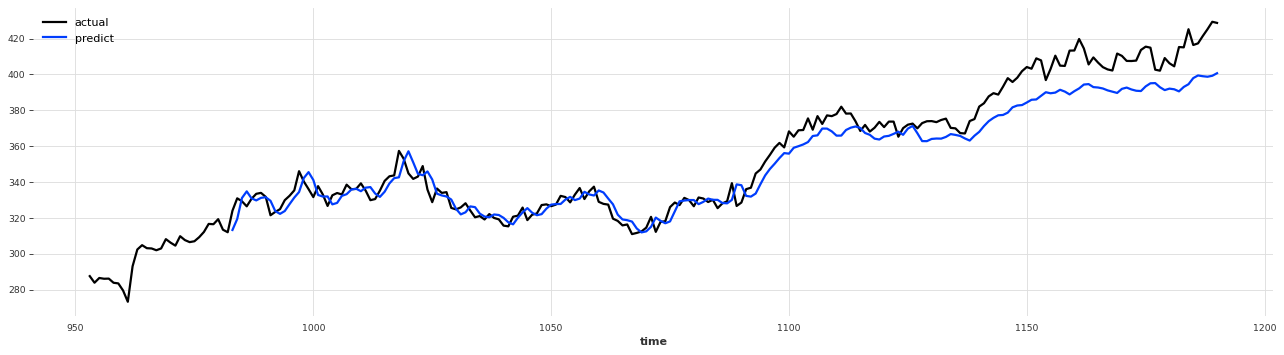

In [76]:
LSTM_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
LSTM_4.fit(train['Close'], past_covariates=past_cov_train)

pred_LSTM_series_4 = LSTM_4.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_4) 

# Evaluation
LSTM4_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM4_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

### With Covariate fn

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 52.2 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
52.7 K    Trainable params
0         Non-trainable params
52.7 K    Total params
0.211     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 29.82


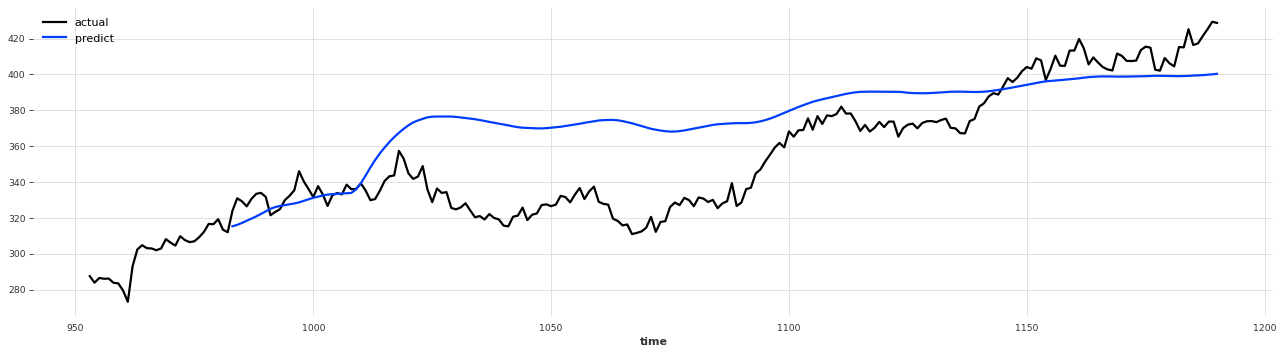

In [80]:
LSTM_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
LSTM_1.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_LSTM_series_1 = LSTM_1.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  # Adjust the length of actual series
pred_pris = scaler.inverse_transform(pred_LSTM_series_1) # Evaluation
# Evaluation
LSTM1_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM1_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 103 K 
4 | fc            | Sequential       | 610   
---------------------------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.418     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 33.14


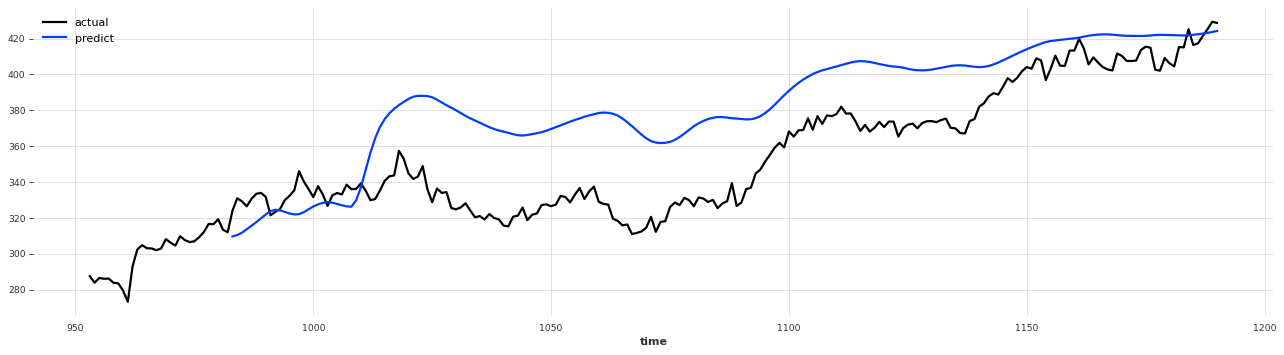

In [81]:
LSTM_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
LSTM_2.fit(train['Close'],past_covariates=past_cov_train_fn)

pred_LSTM_series_2 = LSTM_2.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_2) 

# Evaluation
LSTM2_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM2_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 180 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
181 K     Trainable params
0         Non-trainable params
181 K     Total params
0.725     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 21.89


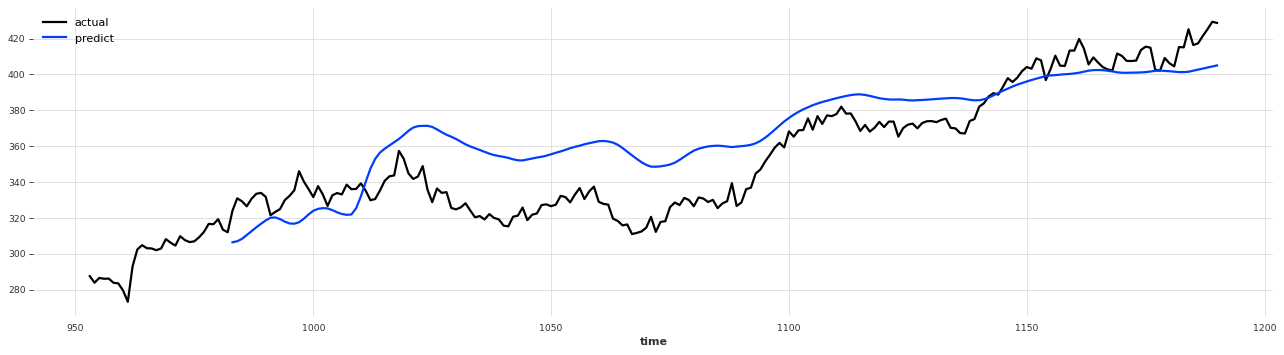

In [83]:
LSTM_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
LSTM_3.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_LSTM_series_3 = LSTM_3.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_3) 

# Evaluation
LSTM3_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM3_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 446 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
447 K     Trainable params
0         Non-trainable params
447 K     Total params
1.791     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 23.98


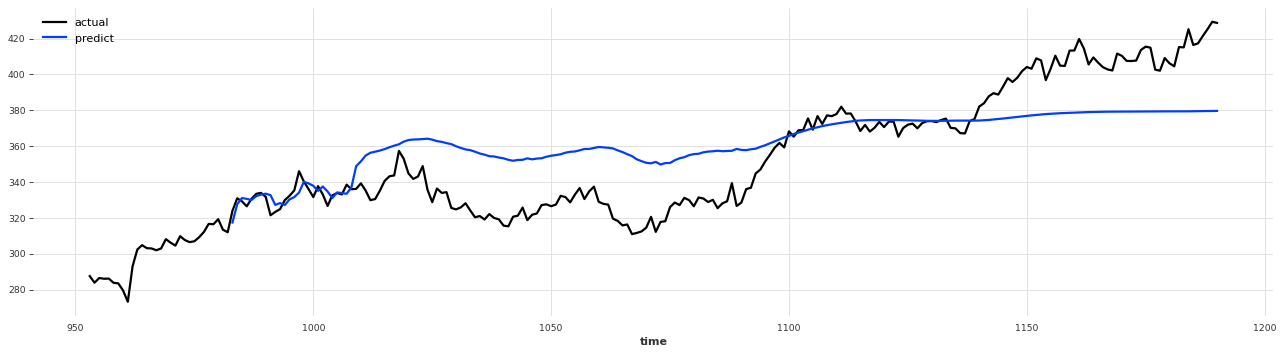

In [82]:
LSTM_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="LSTM",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
LSTM_4.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_LSTM_series_4 = LSTM_4.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_LSTM_series_4) 

# Evaluation
LSTM4_rmse = rmse(pred_pris, actual_pris)
#LSTM1_r2 = r2_score(pred_pris, actual_pris[:208])
#LSTM1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % LSTM4_rmse)
#print("R2 = %.2f" % LSTM1_r2)
#print("MAPE = %.2f" % LSTM1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

# GRU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 38.6 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 19.27


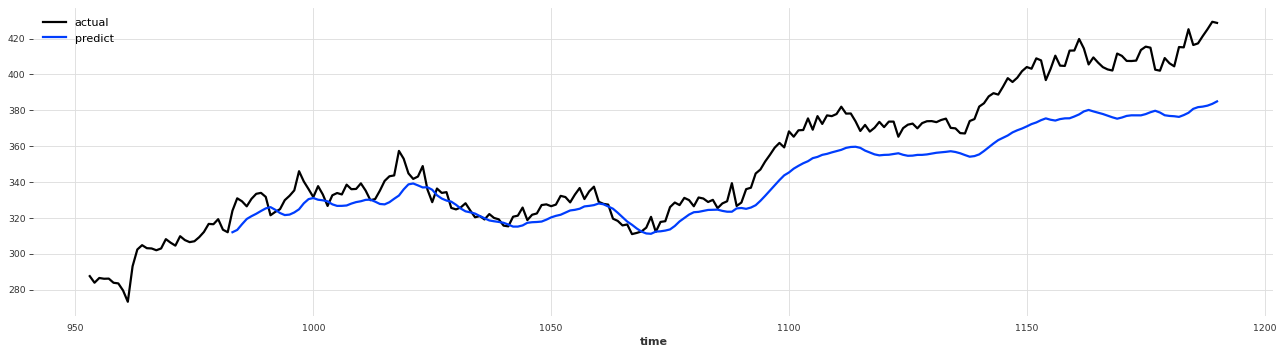

In [64]:
GRU_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
GRU_1.fit(train['Close'])

pred_GRU_series_1 = GRU_1.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_1) 

# Evaluation
GRU1_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU1_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 77.2 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
77.8 K    Trainable params
0         Non-trainable params
77.8 K    Total params
0.311     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 19.72


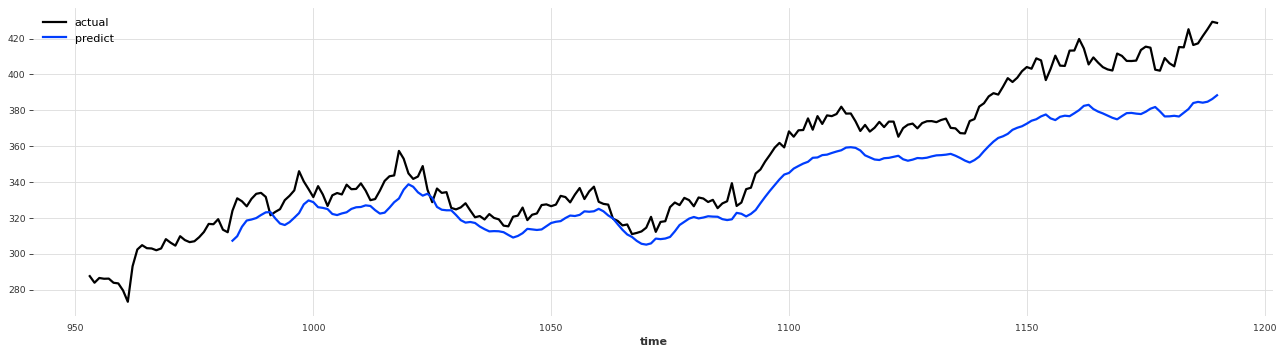

In [67]:
GRU_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
GRU_2.fit(train['Close'])

pred_GRU_series_2 = GRU_2.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_2) 

# Evaluation
GRU2_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU2_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 134 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
135 K     Trainable params
0         Non-trainable params
135 K     Total params
0.541     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 16.54


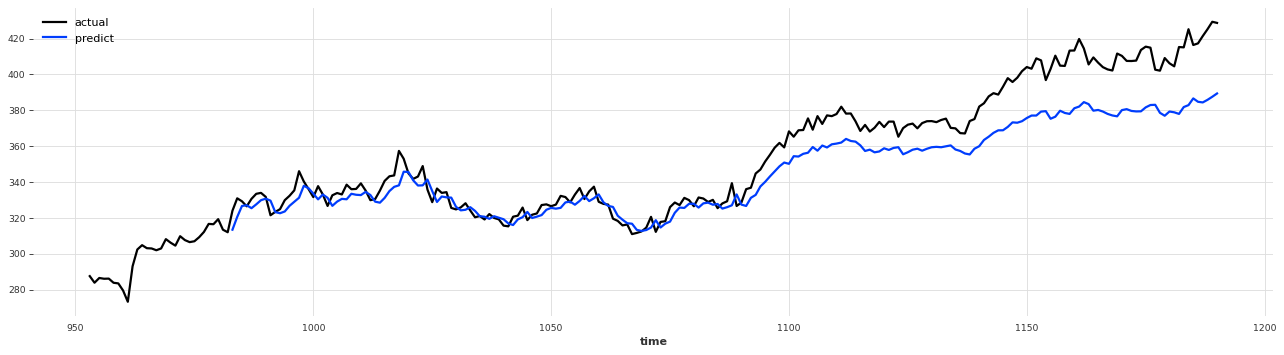

In [69]:
GRU_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
GRU_3.fit(train['Close'])

pred_GRU_series_3 = GRU_3.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_3) 

# Evaluation
GRU3_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU3_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 333 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
334 K     Trainable params
0         Non-trainable params
334 K     Total params
1.340     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 15.33


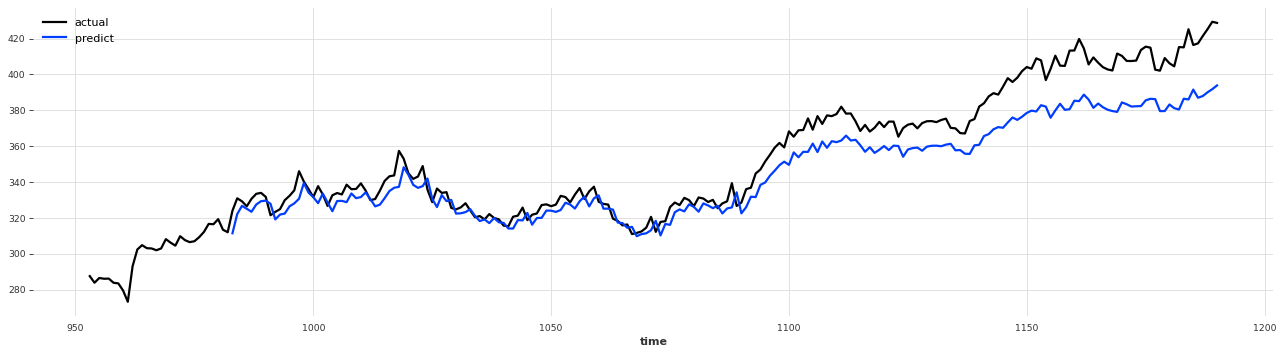

In [71]:
GRU_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
GRU_4.fit(train['Close'])

pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=validation['Close'],
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_4) 

# Evaluation
GRU4_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU4_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

### With Covariate[Volume]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 38.7 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
39.2 K    Trainable params
0         Non-trainable params
39.2 K    Total params
0.157     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 19.72


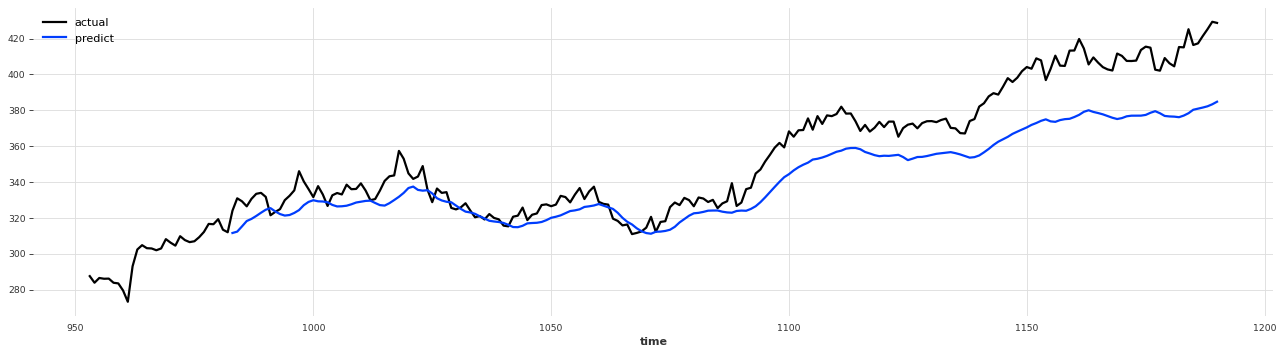

In [73]:
GRU_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
GRU_1.fit(train['Close'], past_covariates=past_cov_train)

pred_GRU_series_1 = GRU_1.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_1) 

# Evaluation
GRU1_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU1_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 77.4 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
78.0 K    Trainable params
0         Non-trainable params
78.0 K    Total params
0.312     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 20.53


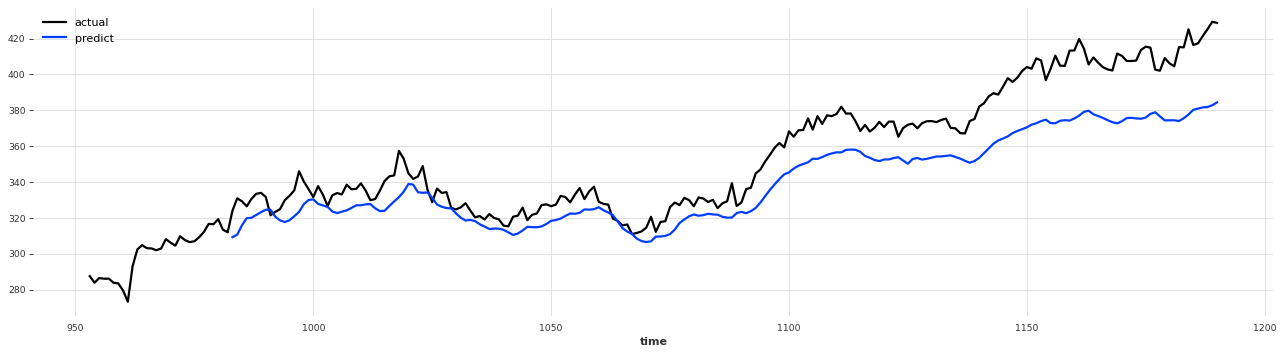

In [77]:
GRU_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
GRU_2.fit(train['Close'], past_covariates=past_cov_train)

pred_GRU_series_2 = GRU_2.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_2) 

# Evaluation
GRU2_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU2_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 134 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
135 K     Trainable params
0         Non-trainable params
135 K     Total params
0.542     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 9.85


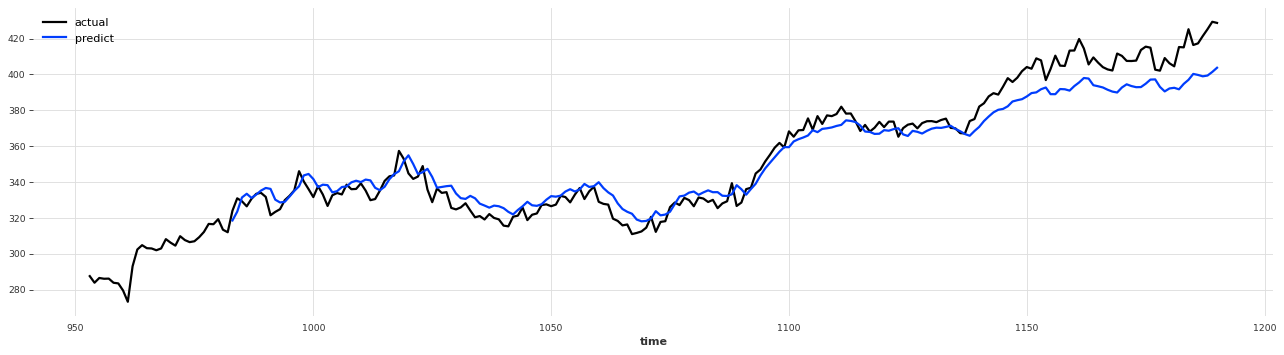

In [78]:
GRU_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
GRU_3.fit(train['Close'], past_covariates=past_cov_train)

pred_GRU_series_3 = GRU_3.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_3) 

# Evaluation
GRU3_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU3_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 334 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
335 K     Trainable params
0         Non-trainable params
335 K     Total params
1.341     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 13.32


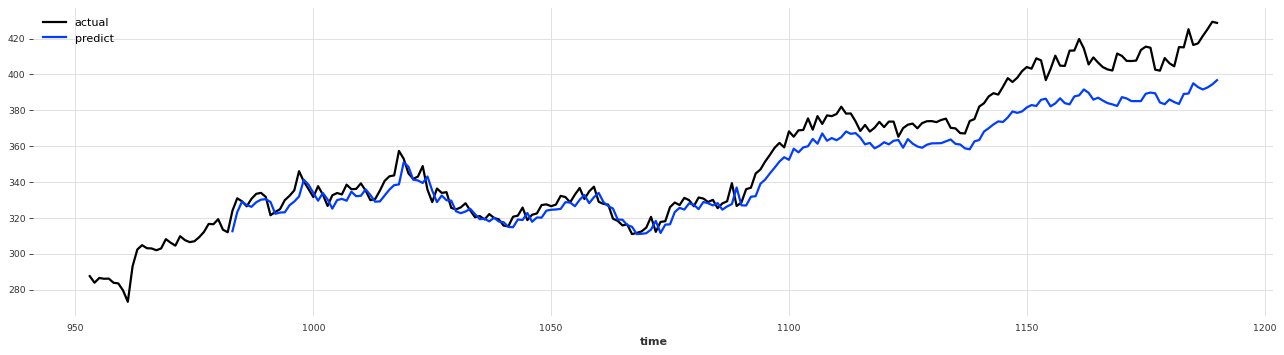

In [79]:
GRU_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
GRU_4.fit(train['Close'], past_covariates=past_cov_train)

pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_4) 

# Evaluation
GRU4_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU4_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()


### With Covariate fn

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 39.1 K
4 | fc            | Sequential       | 510   
---------------------------------------------------
39.7 K    Trainable params
0         Non-trainable params
39.7 K    Total params
0.159     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 17.16


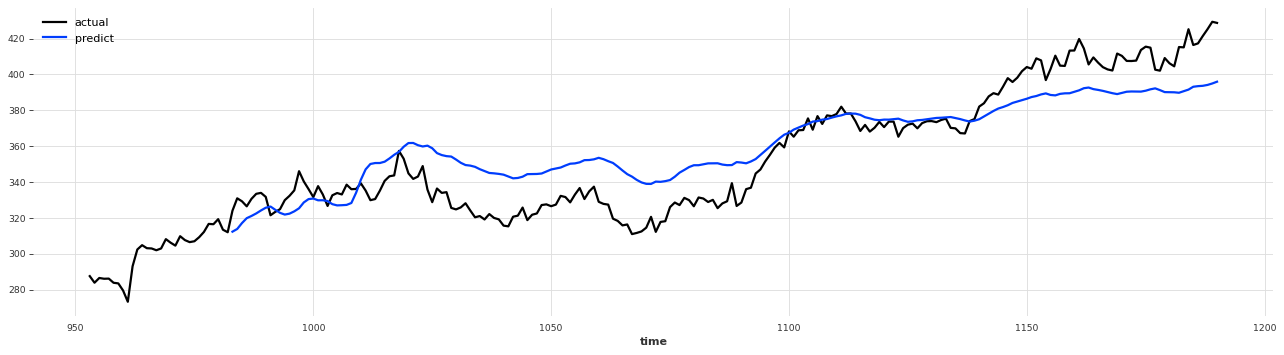

In [84]:
GRU_1 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=50,
    n_rnn_layers=3,
    n_epochs=10
)
GRU_1.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_GRU_series_1 = GRU_1.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_1) 

# Evaluation
GRU1_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU1_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 77.9 K
4 | fc            | Sequential       | 610   
---------------------------------------------------
78.5 K    Trainable params
0         Non-trainable params
78.5 K    Total params
0.314     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 26.93


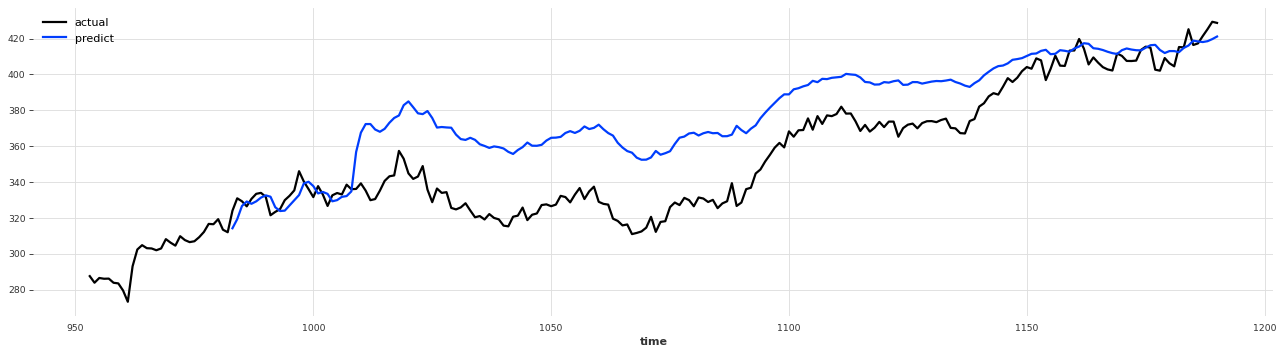

In [85]:
GRU_2 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=60,
    n_rnn_layers=4,
    n_epochs=20
)
GRU_2.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_GRU_series_2 = GRU_2.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_2) 

# Evaluation
GRU2_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU2_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 135 K 
4 | fc            | Sequential       | 710   
---------------------------------------------------
136 K     Trainable params
0         Non-trainable params
136 K     Total params
0.545     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 46.06


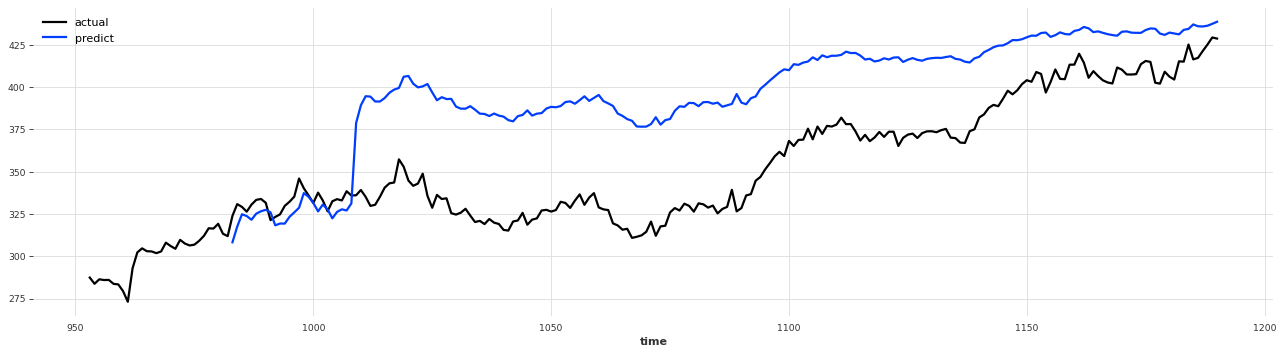

In [86]:
GRU_3 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=70,
    n_rnn_layers=5,
    n_epochs=30
)
GRU_3.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_GRU_series_3 = GRU_3.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_3) 

# Evaluation
GRU3_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU3_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 335 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
336 K     Trainable params
0         Non-trainable params
336 K     Total params
1.344     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU c

RMSE = 35.47


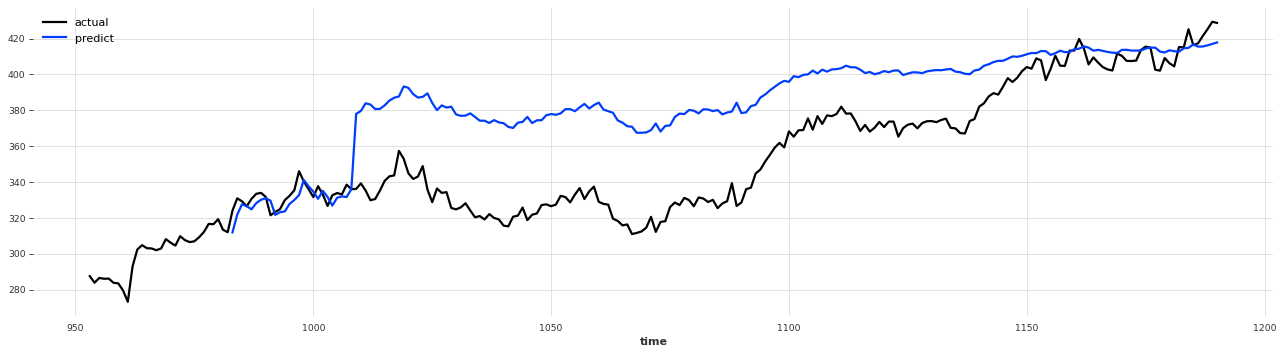

In [87]:
GRU_4 = BlockRNNModel(
    input_chunk_length=30,
    output_chunk_length=10,
    model ="GRU",
    hidden_dim=100,
    n_rnn_layers=6,
    n_epochs=50
)
GRU_4.fit(train['Close'], past_covariates=past_cov_train_fn)

pred_GRU_series_4 = GRU_4.historical_forecasts(
    series=validation['Close'],
    past_covariates=past_cov_val_fn,
    retrain=False,
    verbose=False,
)

# actual price compare to pred_par1_pris
actual_pris = scaler.inverse_transform(validation['Close'])  
pred_pris = scaler.inverse_transform(pred_GRU_series_4) 

# Evaluation
GRU4_rmse = rmse(pred_pris, actual_pris)
#GRU1_r2 = r2_score(pred_pris, actual_pris[:208])
#GRU1_mape = mape(pred_pris, actual_pris[:208])

print("RMSE = %.2f" % GRU4_rmse)
#print("R2 = %.2f" % GRU1_r2)
#print("MAPE = %.2f" % GRU1_mape)

plt.figure(figsize=(20, 5), dpi=80)
actual_pris.plot(label="actual")
pred_pris.plot(label="predict")
plt.show()